In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DIMAS_TI/Datasets DIMAS TI.csv')
df.head()

,Kabupaten/Kota,Tahun,Latitude,Longitude,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),...,Jumlah Penerima Bansos,Jumlah Sekolah SMA (Negeri + Swasta),Jumlah Guru SMA (Negeri + Swasta),Jumlah Murid SMA (Negeri + Swasta),Jumlah Sekolah SMP (Negeri + Swasta),Jumlah Guru SMP (Negeri + Swasta),Jumlah Murid SMP (Negeri + Swasta),Jumlah Sekolah SD (Negeri + Swasta),Jumlah Guru SD (Negeri + Swasta),Jumlah Murid SD (Negeri + Swasta)
0,Pacitan,2020,-81.961,1.110.991,1389.92,69.28,12.64,7.60,99.82,97.25,...,2059,10,299,3830,70,1314,15629,418,4081.0,37830.0
1,Ponorogo,2020,-78.703,1.114.667,1305.70,71.57,13.73,7.54,99.61,98.93,...,1101,27,731,10629,91,1838,23238,583,5600.0,57354.0
2,Trenggalek,2020,-80.569,1.117.145,1147.22,70.10,12.35,7.55,99.70,94.22,...,3174,16,468,7588,84,1677,22436,442,4107.0,44646.0
3,Tulungagung,2020,-80.654,1.119.023,1055.65,73.15,13.31,8.33,99.58,98.47,...,691,24,823,13522,92,2651,36839,639,7264.0,73969.0
4,Blitar,2020,-80.969,1.121.678,1336.48,71.02,12.46,7.39,99.39,98.19,...,821,22,542,9007,105,2179,33152,665,5893.0,71214.0


In [ ]:
df.columns

Index(['Kabupaten/Kota', 'Tahun', 'Latitude', 'Longitude', 'Luas Wilayah',
       'Indeks Pembangunan Manusia (IPM)', 'Harapan Lama Sekolah (Tahun)',
       'Rata-rata Lama sekolah (Tahun)',
       'Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)',
       'Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)',
       'Rasio Guru per Siswa', 'Persentase Penduduk Miskin (Persen)',
       'Tingkat Pengangguran Terbuka (TPT) - Agustus',
       'Tingkat Partisipasi Angkatan Kerja - Agustus',
       'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)',
       'Persentase Rumah Tangga dengan Akses Air Bersih',
       'Kepadatan Penduduk per km persegi (km²)', 'Gini Ratio',
       'Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang)',
       'Jumlah Penerima Bansos', 'Jumlah Sekolah SMA (Negeri + Swasta)',
       'Jumlah Guru 

In [ ]:
from sklearn.linear_model import LinearRegression

# Identify columns with missing values that need to be imputed
cols_to_impute = ['Jumlah Guru SD (Negeri + Swasta)', 'Jumlah Murid SD (Negeri + Swasta)']

# Create a copy of the DataFrame to work with
# df = df.copy()

# Get unique districts
districts = df['Kabupaten/Kota'].unique()

# Iterate through each district
for district in districts:
    df_district = df[df['Kabupaten/Kota'] == district].copy()

    # Iterate through each column to impute
    for col in cols_to_impute:
        # Filter out rows with missing values for the current column
        df_train = df_district.dropna(subset=[col])

        # If there's enough data to train a model (at least 2 data points)
        if len(df_train) >= 2:
            X_train = df_train[['Tahun']]
            y_train = df_train[col]

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict for years with missing values in the current district
            df_predict = df_district[df_district[col].isnull()].copy()
            if not df_predict.empty:
                X_predict = df_predict[['Tahun']]
                y_predict = model.predict(X_predict)

                # Fill the missing values with predictions
                df.loc[df_predict.index, col] = y_predict

# # Now recalculate the derived columns using the imputed values
# df['Rasio Guru SD'] = df['Jumlah Guru SD (Negeri + Swasta)'] / df['Jumlah Murid SD (Negeri + Swasta)']
# df['BebanSiswaPerSekolah_SD'] = df['Jumlah Murid SD (Negeri + Swasta)'] / df['Jumlah Sekolah SD (Negeri + Swasta)']
# df['TingkatTransisi_SD_SMP'] = df['Jumlah Murid SMP (Negeri + Swasta)'] / df['Jumlah Murid SD (Negeri + Swasta)']


# Display the updated DataFrame info and check for remaining missing values
print("DataFrame after imputation and recalculation:")
display(df.info())
print("\nMissing values after imputation:")
display(df.isnull().sum())

DataFrame after imputation and recalculation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 31 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Kabupaten/Kota                                                                              190 non-null    object 
 1   Tahun                                                                                       190 non-null    int64  
 2   Latitude                                                                                    190 non-null    float64
 3   Longitude                                                                                   190 non-null    object 
 4   Luas Wilayah                                                                                190 non-null    float64
 5

None


Missing values after imputation:


,0
Kabupaten/Kota,0
Tahun,0
Latitude,0
Longitude,0
Luas Wilayah,0
Indeks Pembangunan Manusia (IPM),0
Harapan Lama Sekolah (Tahun),0
Rata-rata Lama sekolah (Tahun),0
Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),0
Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),0


In [ ]:
df['Rasio Guru SD'] = df['Jumlah Guru SD (Negeri + Swasta)'] / df['Jumlah Murid SD (Negeri + Swasta)']
df['Rasio Guru SMP'] = df['Jumlah Guru SMP (Negeri + Swasta)'] / df['Jumlah Murid SMP (Negeri + Swasta)']
df['Rasio Guru SMA'] = df['Jumlah Guru SMA (Negeri + Swasta)'] / df['Jumlah Murid SMA (Negeri + Swasta)']

df['APS_Pendidikan_Dasar_Menengah'] = (df['Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)'] + df['Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)'] + df['Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)']) / 3

df['BebanSiswaPerSekolah_SD'] = df['Jumlah Murid SD (Negeri + Swasta)'] / df['Jumlah Sekolah SD (Negeri + Swasta)']
df['BebanSiswaPerSekolah_SMP'] = df['Jumlah Murid SMP (Negeri + Swasta)'] / df['Jumlah Sekolah SMP (Negeri + Swasta)']
df['BebanSiswaPerSekolah_SMA'] = df['Jumlah Murid SMA (Negeri + Swasta)'] / df['Jumlah Sekolah SMA (Negeri + Swasta)']

df['TingkatTransisi_SD_SMP'] = df['Jumlah Murid SMP (Negeri + Swasta)'] / df['Jumlah Murid SD (Negeri + Swasta)']
df['TingkatTransisi_SMP_SMA'] = df['Jumlah Murid SMA (Negeri + Swasta)'] / df['Jumlah Murid SMP (Negeri + Swasta)']

df['KesenjanganPendidikan'] = df['Harapan Lama Sekolah (Tahun)'] - df['Rata-rata Lama sekolah (Tahun)']

df['IndeksDayaDukungEkonomi'] = df['Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)'] / df['Persentase Penduduk Miskin (Persen)']

In [ ]:
df.drop(columns=['Jumlah Guru SD (Negeri + Swasta)', 'Jumlah Murid SD (Negeri + Swasta)', 'Jumlah Guru SMP (Negeri + Swasta)', 'Jumlah Murid SMP (Negeri + Swasta)',
                 'Jumlah Guru SMA (Negeri + Swasta)', 'Jumlah Murid SMA (Negeri + Swasta)', 'Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)', 'Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)',
                 'Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)', 'Jumlah Sekolah SD (Negeri + Swasta)', 'Jumlah Sekolah SMP (Negeri + Swasta)', 'Jumlah Sekolah SMA (Negeri + Swasta)',
                 'Harapan Lama Sekolah (Tahun)', 'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)', 'Persentase Penduduk Miskin (Persen)', 'Harapan Lama Sekolah (Tahun)', 'Rata-rata Lama sekolah (Tahun)',
                 'Latitude', 'Longitude'], inplace=True, axis=1)

In [ ]:
df.describe()

,Tahun,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja - Agustus,Persentase Rumah Tangga dengan Akses Air Bersih,Kepadatan Penduduk per km persegi (km²),Gini Ratio,...,Rasio Guru SMP,Rasio Guru SMA,APS_Pendidikan_Dasar_Menengah,BebanSiswaPerSekolah_SD,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,TingkatTransisi_SD_SMP,TingkatTransisi_SMP_SMA,KesenjanganPendidikan,IndeksDayaDukungEkonomi
count,190.00000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2022.00000,1257.986579,73.924105,23.164263,13.285632,5.140053,71.721158,95.717211,1630.533647,298.358105,...,0.069173,0.063302,91.123368,147.524715,285.585175,406.002050,0.493075,0.466968,5.255158,1451.400755
std,1.41795,1096.892339,4.717365,9.745220,2.388861,1.789839,3.652852,4.968858,2042.639930,110.351271,...,0.013678,0.008245,3.709756,60.995866,95.211931,125.750659,0.091514,0.124476,1.062296,966.435997
min,2020.00000,20.210000,64.750000,10.750000,7.320000,1.360000,63.080000,75.780000,1.061000,0.280000,...,0.049007,0.049290,80.773333,76.140811,92.003096,148.886076,0.323197,0.236283,2.620000,369.949495
25%,2021.00000,634.380000,70.405000,16.052500,11.845000,4.150000,69.292500,94.472500,595.250000,301.000000,...,0.061451,0.058151,88.899167,101.471846,222.296671,351.914694,0.437884,0.383487,4.702500,827.546897
50%,2022.00000,1207.750000,73.165000,20.485000,13.855000,4.910000,71.590000,97.420000,786.000000,330.000000,...,0.065325,0.061329,92.140000,127.923007,300.368065,403.978571,0.482535,0.448893,5.135000,1116.644219
75%,2023.00000,1669.870000,76.905000,28.025000,15.055000,6.045000,73.577500,98.937500,1159.000000,351.000000,...,0.073123,0.065174,93.825000,184.837733,342.166209,476.312500,0.530487,0.544016,5.737500,1761.628249
max,2024.00000,5782.400000,84.000000,61.410000,18.610000,10.970000,82.990000,100.000000,8698.000000,435.000000,...,0.128392,0.086262,98.160000,371.631336,475.141414,661.629630,0.726571,0.893645,7.650000,4792.171717


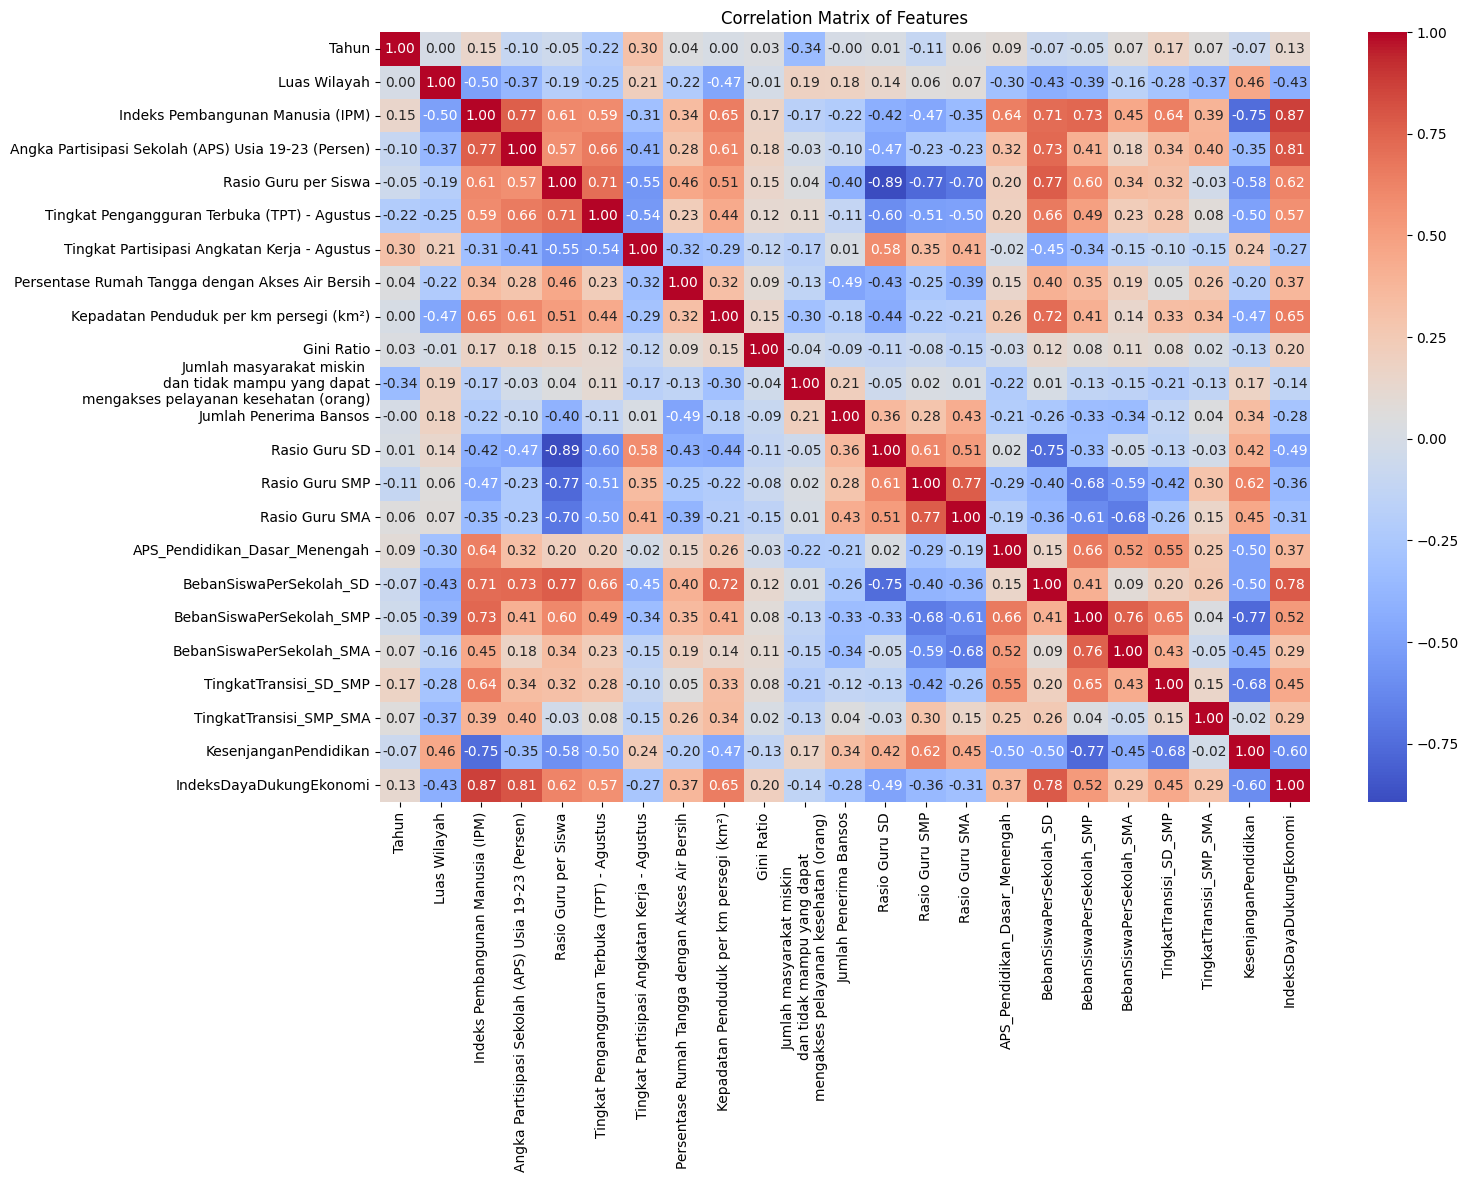

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
df.corr(numeric_only=True)

,Tahun,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja - Agustus,Persentase Rumah Tangga dengan Akses Air Bersih,Kepadatan Penduduk per km persegi (km²),Gini Ratio,...,Rasio Guru SMP,Rasio Guru SMA,APS_Pendidikan_Dasar_Menengah,BebanSiswaPerSekolah_SD,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,TingkatTransisi_SD_SMP,TingkatTransisi_SMP_SMA,KesenjanganPendidikan,IndeksDayaDukungEkonomi
Tahun,1.000000e+00,3.975727e-14,0.145624,-0.101924,-0.053031,-0.220154,0.304892,0.044743,0.004711,0.032581,...,-0.106815,0.055789,0.086563,-0.069248,-0.049446,0.071818,0.173919,0.065326,-0.071693,0.125403
Luas Wilayah,3.975727e-14,1.000000e+00,-0.504963,-0.373007,-0.194120,-0.249027,0.211911,-0.223860,-0.472021,-0.006459,...,0.064192,0.071856,-0.302085,-0.425384,-0.389697,-0.156566,-0.284737,-0.366997,0.457634,-0.426807
Indeks Pembangunan Manusia (IPM),1.456235e-01,-5.049631e-01,1.000000,0.765459,0.607012,0.586011,-0.309949,0.342181,0.651491,0.168404,...,-0.469032,-0.347493,0.640743,0.711952,0.734336,0.454020,0.644223,0.386644,-0.746956,0.866912
Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),-1.019242e-01,-3.730072e-01,0.765459,1.000000,0.573749,0.655834,-0.409188,0.284287,0.606686,0.175404,...,-0.232013,-0.230401,0.323567,0.727833,0.412450,0.177786,0.336032,0.400461,-0.348523,0.807188
Rasio Guru per Siswa,-5.303056e-02,-1.941203e-01,0.607012,0.573749,1.000000,0.705046,-0.554773,0.456487,0.505154,0.146001,...,-0.767527,-0.704398,0.201967,0.774928,0.604587,0.341392,0.318549,-0.032607,-0.583505,0.616361
Tingkat Pengangguran Terbuka (TPT) - Agustus,-2.201543e-01,-2.490274e-01,0.586011,0.655834,0.705046,1.000000,-0.539069,0.227917,0.440118,0.118035,...,-0.512617,-0.498133,0.197801,0.660622,0.490655,0.226190,0.276153,0.078747,-0.498523,0.566102
Tingkat Partisipasi Angkatan Kerja - Agustus,3.048919e-01,2.119110e-01,-0.309949,-0.409188,-0.554773,-0.539069,1.000000,-0.322229,-0.289652,-0.122600,...,0.347469,0.414957,-0.018255,-0.452653,-0.335744,-0.145685,-0.103490,-0.154942,0.239699,-0.269672
Persentase Rumah Tangga dengan Akses Air Bersih,4.474260e-02,-2.238597e-01,0.342181,0.284287,0.456487,0.227917,-0.322229,1.000000,0.323357,0.094347,...,-0.251197,-0.387860,0.146332,0.404081,0.353213,0.194371,0.053408,0.264369,-0.198729,0.371399
Kepadatan Penduduk per km persegi (km²),4.711257e-03,-4.720205e-01,0.651491,0.606686,0.505154,0.440118,-0.289652,0.323357,1.000000,0.145367,...,-0.219911,-0.205195,0.256195,0.716953,0.409311,0.136683,0.333442,0.336249,-0.468570,0.648016
Gini Ratio,3.258072e-02,-6.459188e-03,0.168404,0.175404,0.146001,0.118035,-0.122600,0.094347,0.145367,1.000000,...,-0.079030,-0.152030,-0.034436,0.123667,0.075531,0.108978,0.083317,0.016169,-0.127486,0.203256


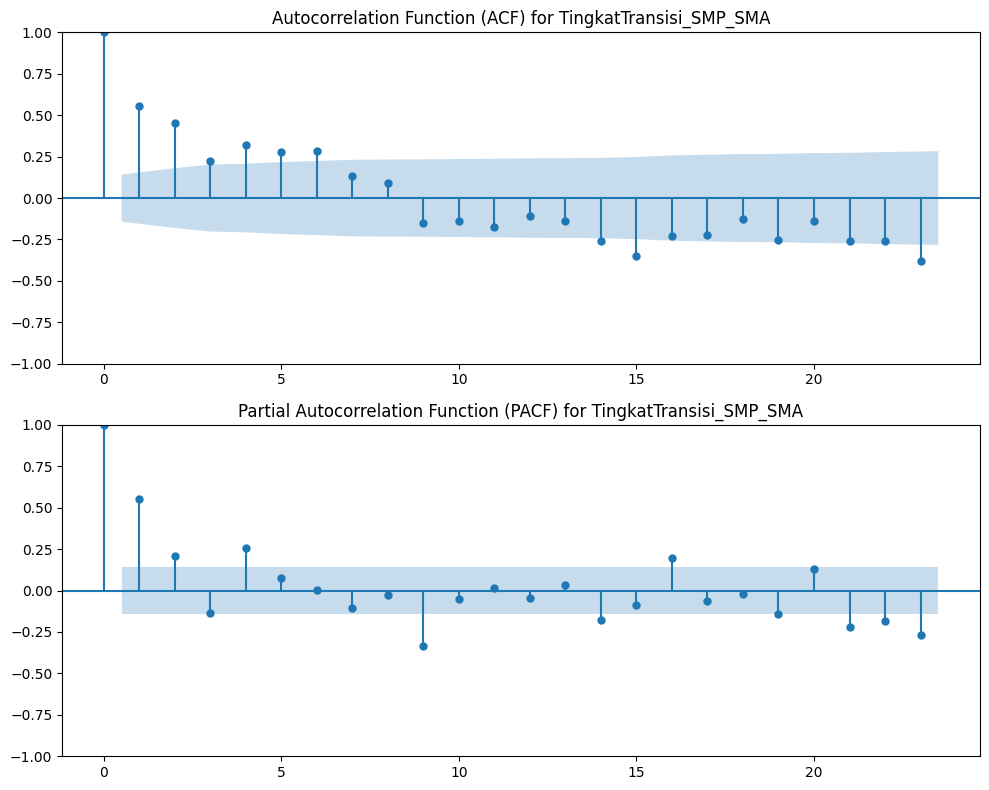

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Replace 'column_name' with the actual name of the column you want to plot
# For example, if you want to plot the ACF and PACF of 'Indeks Pembangunan Manusia (IPM)', use 'Indeks Pembangunan Manusia (IPM)'
column_to_plot = 'TingkatTransisi_SMP_SMA'

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df[column_to_plot], ax=axes[0])
plot_pacf(df[column_to_plot], ax=axes[1])

axes[0].set_title(f'Autocorrelation Function (ACF) for {column_to_plot}')
axes[1].set_title(f'Partial Autocorrelation Function (PACF) for {column_to_plot}')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Asumsikan 'df' adalah DataFrame Anda yang berisi data 5 tahun untuk semua kabupaten/kota

print("Data Awal (Contoh):")
# print(df[df['Kabupaten/Kota'] == 'Pacitan'].head())

# --- Membuat Fitur Lag ---
# .groupby() memastikan kita menghitung lag secara terpisah untuk setiap lokasi
# .shift(1) menggeser data ke bawah satu baris, memberikan nilai dari tahun sebelumnya

df['lag_1'] = df.groupby('Kabupaten/Kota')['TingkatTransisi_SMP_SMA'].shift(1)
df['lag_2'] = df.groupby('Kabupaten/Kota')['TingkatTransisi_SMP_SMA'].shift(2)

print("\nData Setelah Penambahan Fitur Lag (Contoh):")
# Tampilkan kolom yang relevan untuk melihat hasilnya
print(df[df['Kabupaten/Kota'] == 'Pacitan'][['Tahun', 'TingkatTransisi_SMP_SMA', 'lag_1', 'lag_2']].head())

Data Awal (Contoh):

Data Setelah Penambahan Fitur Lag (Contoh):
     Tahun  TingkatTransisi_SMP_SMA     lag_1     lag_2
0     2020                 0.245057       NaN       NaN
38    2021                 0.236283  0.245057       NaN
76    2022                 0.237704  0.236283  0.245057
114   2023                 0.249403  0.237704  0.236283
152   2024                 0.273129  0.249403  0.237704


In [ ]:
print("Jumlah baris sebelum menghapus NaN:", len(df))
print("Jumlah NaN di lag_1:", df['lag_1'].isnull().sum())
print("Jumlah NaN di lag_2:", df['lag_2'].isnull().sum())

Jumlah baris sebelum menghapus NaN: 190
Jumlah NaN di lag_1: 38
Jumlah NaN di lag_2: 76


In [ ]:
df_model = df.dropna()

In [ ]:
print("\nJumlah baris setelah menghapus NaN:", len(df_model))
print("Jumlah NaN setelah dihapus:", df_model.isnull().sum().sum())


Jumlah baris setelah menghapus NaN: 114
Jumlah NaN setelah dihapus: 0


In [ ]:
df_model

,Kabupaten/Kota,Tahun,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),Rasio Guru per Siswa,Tingkat Pengangguran Terbuka (TPT) - Agustus,Tingkat Partisipasi Angkatan Kerja - Agustus,Persentase Rumah Tangga dengan Akses Air Bersih,Kepadatan Penduduk per km persegi (km²),...,APS_Pendidikan_Dasar_Menengah,BebanSiswaPerSekolah_SD,BebanSiswaPerSekolah_SMP,BebanSiswaPerSekolah_SMA,TingkatTransisi_SD_SMP,TingkatTransisi_SMP_SMA,KesenjanganPendidikan,IndeksDayaDukungEkonomi,lag_1,lag_2
76,Pacitan,2022,1389.92,70.19,12.24,9.01,2.04,82.99,83.95,414.0,...,92.310000,83.215311,214.611111,367.300000,0.444227,0.237704,4.84,665.507246,0.236283,0.245057
77,Ponorogo,2022,1305.70,72.59,20.19,11.63,5.51,72.92,91.50,680.0,...,92.156667,89.295337,256.100000,402.884615,0.445805,0.454467,5.99,1094.313305,0.454237,0.457397
78,Trenggalek,2022,1147.22,71.28,13.99,11.82,5.37,72.01,81.23,592.0,...,91.150000,94.933638,265.654762,491.687500,0.537892,0.352543,4.61,916.240876,0.342669,0.338206
79,Tulungagung,2022,1055.65,74.14,21.63,11.94,6.65,71.95,96.39,966.0,...,92.120000,107.626582,383.309278,577.250000,0.546619,0.372610,4.68,1663.487332,0.373703,0.367057
80,Blitar,2022,1336.48,72.25,15.15,14.00,5.45,72.79,96.37,711.0,...,87.283333,98.964018,303.663636,405.727273,0.506037,0.267222,4.82,1263.030999,0.268670,0.271688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Kota Pasuruan,2024,35.29,78.30,19.99,14.85,5.64,75.65,99.38,5626.0,...,92.680000,262.089552,314.413793,403.363636,0.519248,0.486620,3.89,2254.746835,0.482197,0.463830
186,Kota Mojokerto,2024,20.21,80.90,29.55,14.34,4.73,72.50,99.95,6796.0,...,95.470000,204.872727,430.894737,420.181818,0.726571,0.564554,3.08,2589.228007,0.542840,0.509020
187,Kota Madiun,2024,33.92,83.71,31.18,14.64,5.85,69.29,99.10,5585.0,...,93.170000,198.411765,400.782609,552.909091,0.683220,0.659796,2.72,3907.534247,0.663173,0.631620
188,Kota Surabaya,2024,350.54,83.99,42.46,17.19,6.76,68.73,98.15,8698.0,...,89.916667,327.821813,334.132911,414.985612,0.494752,0.546313,4.17,4792.171717,0.541880,0.520588


In [ ]:
df_model.columns

Index(['Kabupaten/Kota', 'Tahun', 'Luas Wilayah',
       'Indeks Pembangunan Manusia (IPM)',
       'Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)',
       'Rasio Guru per Siswa', 'Tingkat Pengangguran Terbuka (TPT) - Agustus',
       'Tingkat Partisipasi Angkatan Kerja - Agustus',
       'Persentase Rumah Tangga dengan Akses Air Bersih',
       'Kepadatan Penduduk per km persegi (km²)', 'Gini Ratio',
       'Jumlah masyarakat miskin \ndan tidak mampu yang dapat\nmengakses pelayanan kesehatan (orang)',
       'Jumlah Penerima Bansos', 'Rasio Guru SD', 'Rasio Guru SMP',
       'Rasio Guru SMA', 'APS_Pendidikan_Dasar_Menengah',
       'BebanSiswaPerSekolah_SD', 'BebanSiswaPerSekolah_SMP',
       'BebanSiswaPerSekolah_SMA', 'TingkatTransisi_SD_SMP',
       'TingkatTransisi_SMP_SMA', 'KesenjanganPendidikan',
       'IndeksDayaDukungEkonomi', 'lag_1', 'lag_2'],
      dtype='object')

In [ ]:
df_model.shape

(114, 26)

In [ ]:
print(df_model[df_model['Kabupaten/Kota'] == 'Pacitan'][['Tahun', 'TingkatTransisi_SMP_SMA', 'lag_1', 'lag_2']].head())

     Tahun  TingkatTransisi_SMP_SMA     lag_1     lag_2
76    2022                 0.237704  0.236283  0.245057
114   2023                 0.249403  0.237704  0.236283
152   2024                 0.273129  0.249403  0.237704


In [ ]:
# =================================================================
# LANGKAH SELANJUTNYA: MEMISAHKAN DATA TRAINING DAN TESTING
# =================================================================

# Asumsikan df_model adalah DataFrame Anda yang berisi data 3 tahun yang valid (2022, 2023, 2024)

print("Memisahkan data menjadi set training (2022-2023) dan testing (2024)...")

# Data SEBELUM tahun 2024 digunakan untuk melatih model
train = df_model[df_model['Tahun'] < 2024]

# Data HANYA dari tahun 2024 digunakan untuk menguji performa model
test = df_model[df_model['Tahun'] == 2024]

print(f"Jumlah baris data training (tahun 2022 & 2023): {len(train)}")
print(f"Jumlah baris data testing (tahun 2024): {len(test)}")

# Definisikan fitur-fitur prediktor (X) dan target (y)
# Hapus kolom non-prediktor dan target itu sendiri
features = df_model.drop(columns=['Kabupaten/Kota', 'Tahun', 'TingkatTransisi_SMP_SMA']).columns
target = 'TingkatTransisi_SMP_SMA'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

print("\nBentuk data training:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nBentuk data testing:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

print("\nData siap untuk dimasukkan ke dalam model XGBoost.")

Memisahkan data menjadi set training (2022-2023) dan testing (2024)...
Jumlah baris data training (tahun 2022 & 2023): 76
Jumlah baris data testing (tahun 2024): 38

Bentuk data training:
X_train: (76, 23), y_train: (76,)

Bentuk data testing:
X_test: (38, 23), y_test: (38,)

Data siap untuk dimasukkan ke dalam model XGBoost.


In [ ]:
# Asumsikan df_model adalah DataFrame Anda yang bersih dan berisi 3 tahun data (2022, 2023, 2024)

print("Melatih model final pada semua data historis (2022-2024)...")

# Definisikan fitur dan target dari keseluruhan data
features = df_model.drop(columns=['Kabupaten/Kota', 'Tahun', 'TingkatTransisi_SMP_SMA']).columns
target = 'TingkatTransisi_SMP_SMA'

X_full = df_model[features]
y_full = df_model[target]

# Inisialisasi dan latih model XGBoost final
import xgboost as xgb
final_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
final_model.fit(X_full, y_full)

print("Model final siap untuk melakukan prediksi. 🚀")

Melatih model final pada semua data historis (2022-2024)...
Model final siap untuk melakukan prediksi. 🚀


persiapan prediksi 2025

In [ ]:
print("\nMempersiapkan data untuk prediksi tahun 2025...")

# Ambil data dari tahun terakhir yang kita punya (2024) untuk setiap kabupaten
latest_data = df_model[df_model['Tahun'] == 2024].copy()

# Siapkan DataFrame input untuk tahun 2025
X_2025 = pd.DataFrame()

# Buat fitur lag untuk 2025
# lag_1 untuk 2025 adalah nilai aktual dari 2024
X_2025['lag_1'] = latest_data['TingkatTransisi_SMP_SMA']
# lag_2 untuk 2025 adalah nilai lag_1 dari 2024 (yaitu nilai aktual dari 2023)
X_2025['lag_2'] = latest_data['lag_1']

# Isi fitur-fitur lainnya. Untuk fitur non-lag, kita bisa asumsikan nilainya sama dengan tahun 2024
# (asumsi perubahan lambat untuk fitur sosio-ekonomi)
for col in features:
    if col not in ['lag_1', 'lag_2']:
        X_2025[col] = latest_data[col].values

# Pastikan urutan kolomnya sama persis dengan saat training
X_2025 = X_2025[features]


Mempersiapkan data untuk prediksi tahun 2025...


prediksi 2025

In [ ]:
# Lakukan prediksi untuk tahun 2025
predictions_2025 = final_model.predict(X_2025)

# Simpan hasil prediksi
df_predictions = pd.DataFrame({
    'Kabupaten/Kota': latest_data['Kabupaten/Kota'].values,
    'Prediksi_2025': predictions_2025
})

print("\nHasil prediksi untuk tahun 2025:")
print(df_predictions.head())


Hasil prediksi untuk tahun 2025:
  Kabupaten/Kota  Prediksi_2025
0        Pacitan       0.272782
1       Ponorogo       0.453885
2     Trenggalek       0.377294
3    Tulungagung       0.381422
4         Blitar       0.270834


prediksi 2026

In [ ]:
print("\nMempersiapkan data untuk prediksi tahun 2026...")

# Siapkan DataFrame input untuk tahun 2026
X_2026 = pd.DataFrame()

# Buat fitur lag untuk 2026
# lag_1 untuk 2026 adalah PREDIKSI dari tahun 2025
X_2026['lag_1'] = predictions_2025
# lag_2 untuk 2026 adalah nilai aktual dari 2024
X_2026['lag_2'] = latest_data['TingkatTransisi_SMP_SMA'].values

# Isi fitur-fitur lainnya, kita asumsikan masih sama dengan tahun 2024
for col in features:
    if col not in ['lag_1', 'lag_2']:
        X_2026[col] = latest_data[col].values

# Pastikan urutan kolomnya sama
X_2026 = X_2026[features]

# Buat prediksi untuk tahun 2026
predictions_2026 = final_model.predict(X_2026)

# Tambahkan hasil prediksi 2026 ke DataFrame kita
df_predictions['Prediksi_2026'] = predictions_2026


Mempersiapkan data untuk prediksi tahun 2026...


In [ ]:
print("Hasil prediksi untuk tahun 2025:")
print(df_predictions.head())

Hasil prediksi untuk tahun 2025:
  Kabupaten/Kota  Prediksi_2025  Prediksi_2026
0        Pacitan       0.272782       0.272782
1       Ponorogo       0.453885       0.454819
2     Trenggalek       0.377294       0.385036
3    Tulungagung       0.381422       0.381422
4         Blitar       0.270834       0.270834


In [ ]:
print("\n--- Hasil Proyeksi Final untuk 2 Tahun ke Depan ---")
print(df_predictions.to_string())

# Anda bisa menggabungkan ini dengan data historis untuk divisualisasikan
# dalam bentuk grafik garis untuk setiap kabupaten/kota.


--- Hasil Proyeksi Final untuk 2 Tahun ke Depan ---
      Kabupaten/Kota  Prediksi_2025  Prediksi_2026
0            Pacitan       0.272782       0.272782
1           Ponorogo       0.453885       0.454819
2         Trenggalek       0.377294       0.385036
3        Tulungagung       0.381422       0.381422
4             Blitar       0.270834       0.270834
5             Kediri       0.351921       0.351921
6             Malang       0.314999       0.314999
7           Lumajang       0.406871       0.406871
8             Jember       0.362942       0.362942
9         Banyuwangi       0.370595       0.357911
10         Bondowoso       0.455187       0.457543
11         Situbondo       0.532191       0.532191
12       Probolinggo       0.493025       0.493025
13          Pasuruan       0.310799       0.310799
14          Sidoarjo       0.454730       0.455334
15         Mojokerto       0.409842       0.409842
16           Jombang       0.442308       0.442308
17           Nganjuk       0.

In [ ]:
# Create a DataFrame with relevant columns from the original data (2020-2024)
df_historical = df[['Kabupaten/Kota', 'Tahun', 'TingkatTransisi_SMP_SMA']].copy()

# Prepare the predictions DataFrame for merging
# Rename the prediction columns to match the historical data column name
df_predictions_renamed = df_predictions.rename(columns={'Prediksi_2025': 'TingkatTransisi_SMP_SMA'})

# Add a 'Tahun' column for the predicted years
df_predictions_2025 = df_predictions_renamed[['Kabupaten/Kota', 'TingkatTransisi_SMP_SMA']].copy()
df_predictions_2025['Tahun'] = 2025

df_predictions_2026 = df_predictions_renamed[['Kabupaten/Kota', 'Prediksi_2026']].copy()
df_predictions_2026.rename(columns={'Prediksi_2026': 'TingkatTransisi_SMP_SMA'}, inplace=True)
df_predictions_2026['Tahun'] = 2026

# Concatenate the historical and predicted dataframes
df_combined = pd.concat([df_historical, df_predictions_2025, df_predictions_2026], ignore_index=True)

# Sort the combined DataFrame by Kabupaten/Kota and Tahun for better visualization
df_combined = df_combined.sort_values(by=['Kabupaten/Kota', 'Tahun']).reset_index(drop=True)

print("Combined DataFrame with historical and predicted data:")
display(df_combined.head())
display(df_combined.tail())

Combined DataFrame with historical and predicted data:


,Kabupaten/Kota,Tahun,TingkatTransisi_SMP_SMA
0,Bangkalan,2020,0.461754
1,Bangkalan,2021,0.458118
2,Bangkalan,2022,0.472459
3,Bangkalan,2023,0.469981
4,Bangkalan,2024,0.467705


,Kabupaten/Kota,Tahun,TingkatTransisi_SMP_SMA
261,Tulungagung,2022,0.372610
262,Tulungagung,2023,0.373997
263,Tulungagung,2024,0.381684
264,Tulungagung,2025,0.381422
265,Tulungagung,2026,0.381422


In [ ]:
# Save the df_predictions DataFrame to a CSV file
output_path_predictions = '/content/drive/MyDrive/DIMAS_TI/df_predictions.csv'
df_predictions.to_csv(output_path_predictions, index=False)

print(f"DataFrame 'df_predictions' successfully saved to {output_path_predictions}")

DataFrame 'df_predictions' successfully saved to /content/drive/MyDrive/DIMAS_TI/df_predictions.csv


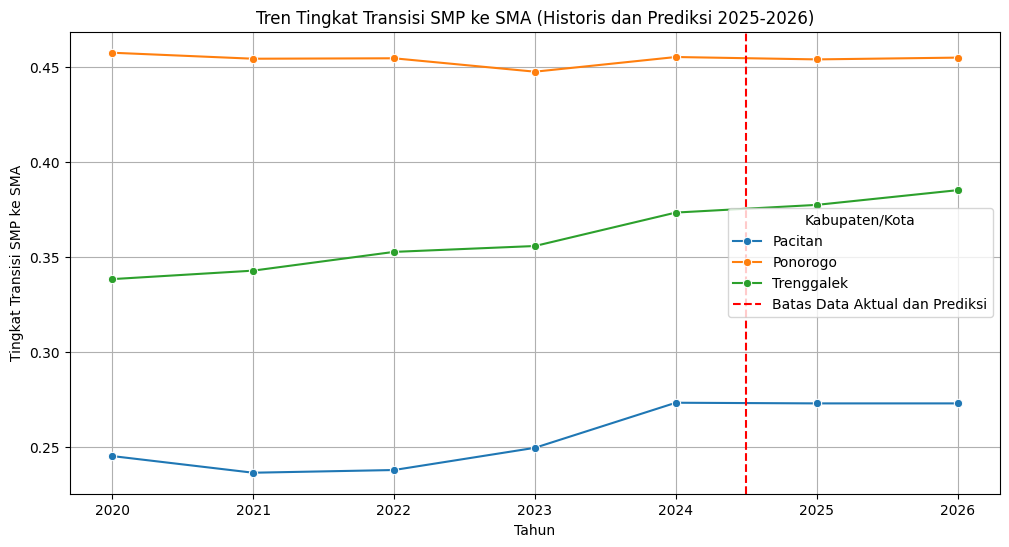

In [ ]:
# Select three kabupaten/kota for visualization
selected_kabupaten = ['Pacitan', 'Ponorogo', 'Trenggalek']

# Filter the combined DataFrame for the selected kabupaten/kota
df_selected = df_combined[df_combined['Kabupaten/Kota'].isin(selected_kabupaten)].copy()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Tahun', y='TingkatTransisi_SMP_SMA', hue='Kabupaten/Kota', marker='o')

# Add a vertical line to separate historical and predicted data (assuming 2024 is the last historical year)
plt.axvline(x=2024.5, color='red', linestyle='--', label='Batas Data Aktual dan Prediksi')

plt.title('Tren Tingkat Transisi SMP ke SMA (Historis dan Prediksi 2025-2026)')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Transisi SMP ke SMA')
plt.xticks(df_selected['Tahun'].unique()) # Ensure all years are shown as ticks
plt.legend(title='Kabupaten/Kota')
plt.grid(True)
plt.show()

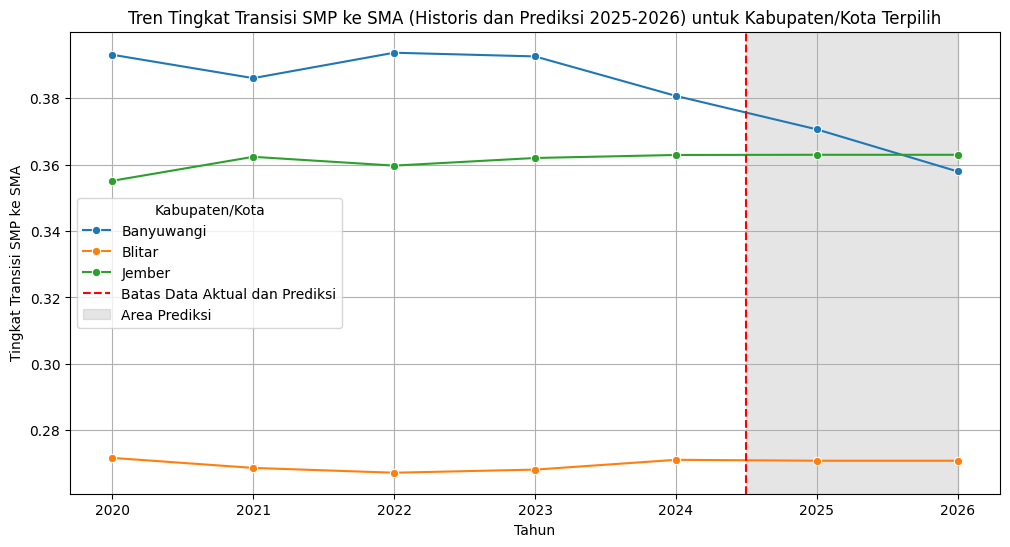

In [ ]:
# Select specific kabupaten/kota for visualization
selected_kabupaten_specific = ['Blitar', 'Banyuwangi', 'Jember']

# Filter the combined DataFrame for the selected kabupaten/kota
df_selected_specific = df_combined[df_combined['Kabupaten/Kota'].isin(selected_kabupaten_specific)].copy()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_specific, x='Tahun', y='TingkatTransisi_SMP_SMA', hue='Kabupaten/Kota', marker='o')

# Add a vertical line to separate historical and predicted data (assuming 2024 is the last historical year)
plt.axvline(x=2024.5, color='red', linestyle='--', label='Batas Data Aktual dan Prediksi')

# Shade the predicted area (2025 and 2026)
plt.axvspan(2024.5, 2026, color='grey', alpha=0.2, label='Area Prediksi')


plt.title('Tren Tingkat Transisi SMP ke SMA (Historis dan Prediksi 2025-2026) untuk Kabupaten/Kota Terpilih')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Transisi SMP ke SMA')
plt.xticks(df_selected_specific['Tahun'].unique()) # Ensure all years are shown as ticks
plt.legend(title='Kabupaten/Kota')
plt.grid(True)
plt.show()

In [ ]:
# Save the combined DataFrame to a CSV file
output_path = '/content/drive/MyDrive/DIMAS_TI/combined_transition_data.csv'
df_combined.to_csv(output_path, index=False)

print(f"DataFrame 'df_combined' successfully saved to {output_path}")

DataFrame 'df_combined' successfully saved to /content/drive/MyDrive/DIMAS_TI/combined_transition_data.csv


In [ ]:
# Calculate the average transition rate from SMP to SMA for each district/city from 2020 to 2024
average_transition_historical = df_historical.groupby('Kabupaten/Kota')['TingkatTransisi_SMP_SMA'].mean().reset_index()

print("\nAverage Transition Rate from SMP to SMA (2020-2024):")
display(average_transition_historical)


Average Transition Rate from SMP to SMA (2020-2024):


,Kabupaten/Kota,TingkatTransisi_SMP_SMA
0,Bangkalan,0.466003
1,Banyuwangi,0.389196
2,Blitar,0.269369
3,Bojonegoro,0.527564
4,Bondowoso,0.440374
5,Gresik,0.587484
6,Jember,0.360398
7,Jombang,0.442644
8,Kediri,0.337079
9,Kota Batu,0.552115


In [ ]:
# Calculate the average transition rate from SMP to SMA for each district/city from 2020 to 2024
average_transition_historical = df_historical.groupby('Kabupaten/Kota')['TingkatTransisi_SMP_SMA'].mean().reset_index()

# Save the average transition rate DataFrame to a CSV file
output_path_average = '/content/drive/MyDrive/DIMAS_TI/average_transition_historical.csv'
average_transition_historical.to_csv(output_path_average, index=False)

print(f"DataFrame 'average_transition_historical' successfully saved to {output_path_average}")

DataFrame 'average_transition_historical' successfully saved to /content/drive/MyDrive/DIMAS_TI/average_transition_historical.csv


In [ ]:
# Calculate the average predicted transition rate from SMP to SMA for each district/city for 2025 and 2026
# We can average the two prediction columns for a simple average over the two years
df_predictions['Average_Prediksi_2025_2026'] = df_predictions[['Prediksi_2025', 'Prediksi_2026']].mean(axis=1)

average_transition_predicted = df_predictions[['Kabupaten/Kota', 'Average_Prediksi_2025_2026']].copy()

print("\nAverage Predicted Transition Rate from SMP to SMA (2025-2026):")
display(average_transition_predicted.head())

# Save the average predicted transition rate DataFrame to a CSV file
output_path_predicted_average = '/content/drive/MyDrive/DIMAS_TI/average_transition_predicted_2025_2026.csv'
average_transition_predicted.to_csv(output_path_predicted_average, index=False)

print(f"DataFrame 'average_transition_predicted' successfully saved to {output_path_predicted_average}")


Average Predicted Transition Rate from SMP to SMA (2025-2026):


,Kabupaten/Kota,Average_Prediksi_2025_2026
0,Pacitan,0.272782
1,Ponorogo,0.454352
2,Trenggalek,0.381165
3,Tulungagung,0.381422
4,Blitar,0.270834


DataFrame 'average_transition_predicted' successfully saved to /content/drive/MyDrive/DIMAS_TI/average_transition_predicted_2025_2026.csv


In [ ]:
df_klaster = pd.read_csv("/content/Klasterjatim - Sheet1.csv")
df_klaster

,Kabupaten/Kota,Tahun,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Rasio Guru per Siswa,Gini Ratio,Cluster,Label Interpretasi
0,Pacitan,2024,70.94,12.69,7.88,495.433,327,1,Daerah Pendidikan Transisi
1,Ponorogo,2024,73.18,13.78,7.78,641.591,326,1,Daerah Pendidikan Transisi
2,Trenggalek,2024,71.96,12.63,8.195.526,714.902,35,0,Daerah Pendidikan Terbatas
3,Tulungagung,2024,74.65,13.36,8.66,641.053,321,1,Daerah Pendidikan Transisi
4,Blitar,2024,72.84,12.67,7.83,678.667,353,1,Daerah Pendidikan Transisi
5,Kediri,2024,74.68,13.63,8.24,800.107,3,0,Daerah Pendidikan Terbatas
6,Malang,2024,73.00,13.49,7.75,853.842,343,1,Daerah Pendidikan Transisi
7,Lumajang,2024,69.37,12.41,7.14,748.522,363,1,Daerah Pendidikan Transisi
8,Jember,2024,70.42,1.344.644,6.52,79.151,321,1,Daerah Pendidikan Transisi
9,Banyuwangi,2024,73.79,13.14,7.76,714.902,312,1,Daerah Pendidikan Transisi


In [ ]:
# Merge the predictions DataFrame with the cluster information based on 'Kabupaten/Kota'
df_predictions_with_cluster = pd.merge(df_predictions[['Kabupaten/Kota', 'Prediksi_2025', 'Prediksi_2026']],
                                     df_klaster[['Kabupaten/Kota', 'Label Interpretasi']],
                                     on='Kabupaten/Kota',
                                     how='left')

print("DataFrame with Cluster Label and Predictions:")
display(df_predictions_with_cluster.head())

DataFrame with Cluster Label and Predictions:


,Kabupaten/Kota,Prediksi_2025,Prediksi_2026,Label Interpretasi
0,Pacitan,0.272782,0.272782,Daerah Pendidikan Transisi
1,Ponorogo,0.453885,0.454819,Daerah Pendidikan Transisi
2,Trenggalek,0.377294,0.385036,Daerah Pendidikan Terbatas
3,Tulungagung,0.381422,0.381422,Daerah Pendidikan Transisi
4,Blitar,0.270834,0.270834,Daerah Pendidikan Transisi


In [ ]:
# Merge the average predicted transition rates (2025-2026) with the cluster information
df_avg_predictions_with_cluster = pd.merge(average_transition_predicted, df_klaster[['Kabupaten/Kota', 'Label Interpretasi']],
                                          on='Kabupaten/Kota',
                                          how='left')

print("DataFrame with Cluster Label and Average Predicted Transition Rate (2025-2026):")
display(df_avg_predictions_with_cluster.head())

DataFrame with Cluster Label and Average Predicted Transition Rate (2025-2026):


,Kabupaten/Kota,Average_Prediksi_2025_2026,Label Interpretasi
0,Pacitan,0.272782,Daerah Pendidikan Transisi
1,Ponorogo,0.454352,Daerah Pendidikan Transisi
2,Trenggalek,0.381165,Daerah Pendidikan Terbatas
3,Tulungagung,0.381422,Daerah Pendidikan Transisi
4,Blitar,0.270834,Daerah Pendidikan Transisi


In [ ]:
# Merge the average predicted transition rates with the cluster information
merged_predicted_cluster = pd.merge(average_transition_predicted, df_klaster[['Kabupaten/Kota', 'Label Interpretasi']], on='Kabupaten/Kota', how='left')

# Calculate the average predicted transition rate for each cluster
average_predicted_by_cluster = merged_predicted_cluster.groupby('Label Interpretasi')['Average_Prediksi_2025_2026'].mean().reset_index()

print("\nAverage Predicted Transition Rate (2025-2026) per Cluster:")
display(average_predicted_by_cluster)


Average Predicted Transition Rate (2025-2026) per Cluster:


,Label Interpretasi,Average_Prediksi_2025_2026
0,Daerah Pendidikan Terbatas,0.430816
1,Daerah Pendidikan Transisi,0.448412
2,Daerah Pendidikan Unggul,0.592298


/tmp/ipython-input-3864206330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_predicted_by_cluster, x='Label Interpretasi', y='Average_Prediksi_2025_2026', palette='viridis')


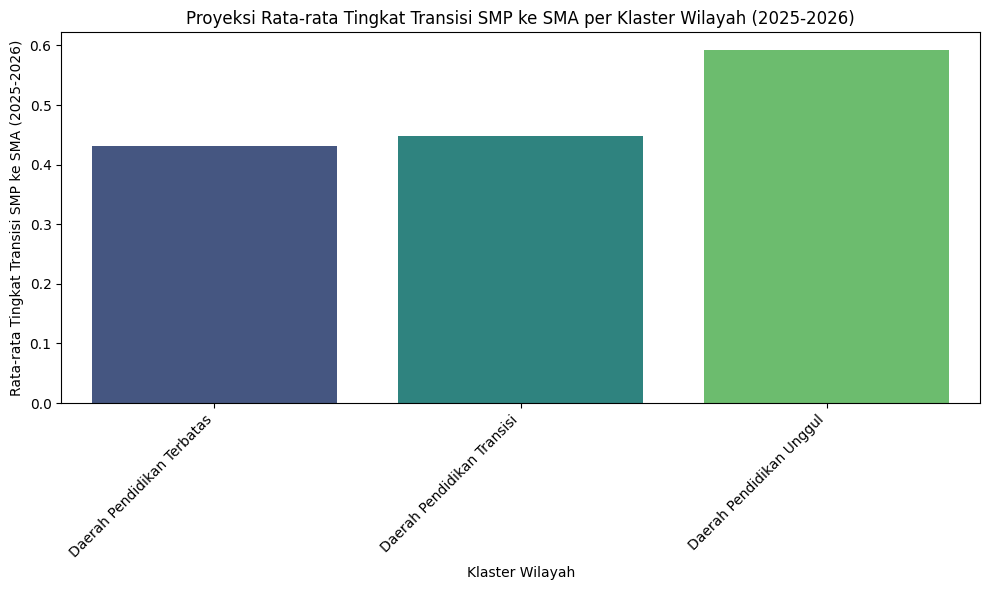

In [ ]:
# Create a bar plot of the average predicted transition rate per cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=average_predicted_by_cluster, x='Label Interpretasi', y='Average_Prediksi_2025_2026', palette='viridis')

plt.title('Proyeksi Rata-rata Tingkat Transisi SMP ke SMA per Klaster Wilayah (2025-2026)')
plt.xlabel('Klaster Wilayah')
plt.ylabel('Rata-rata Tingkat Transisi SMP ke SMA (2025-2026)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Group df_klaster by 'Label Interpretasi' and list the Kabupaten/Kota in each group
clustered_districts = df_klaster.groupby('Label Interpretasi')['Kabupaten/Kota'].apply(list).reset_index()

pd.set_option('display.max_colwidth', None)
print("Districts grouped by Cluster Label:")
display(clustered_districts)

# Alternatively, you can iterate through the groups and print them
# print("\nDistricts by Cluster Label (alternative display):")
# for label, group in df_klaster.groupby('Label Interpretasi'):
#     print(f"\nCluster: {label}")
#     print(group['Kabupaten/Kota'].tolist())

Districts grouped by Cluster Label:


,Label Interpretasi,Kabupaten/Kota
0,Daerah Pendidikan Terbatas,"[Trenggalek, Kediri, Bojonegoro]"
1,Daerah Pendidikan Transisi,"[Pacitan, Ponorogo, Tulungagung, Blitar, Malang, Lumajang, Jember, Banyuwangi, Bondowoso, Situbondo, Probolinggo, Pasuruan, Mojokerto, Jombang, Nganjuk, Madiun, Magetan, Ngawi, Tuban, Lamongan, Gresik, Bangkalan, Sampang, Pamekasan, Sumenep]"
2,Daerah Pendidikan Unggul,"[Sidoarjo, Kota Kediri, Kota Blitar, Kota Malang, Kota Probolinggo, Kota Pasuruan, Kota Mojokerto, Kota Madiun, Kota Surabaya, Kota Batu]"


In [ ]:
# Pivot the combined DataFrame to have years as columns
df_transition_summary = df_combined.pivot(index='Kabupaten/Kota', columns='Tahun', values='TingkatTransisi_SMP_SMA').reset_index()

# Rename columns for clarity (optional, but good practice)
df_transition_summary.columns.name = None # Remove the 'Tahun' column name
df_transition_summary.rename(columns={
    2020: 'TingkatTransisi_SMP_SMA_2020',
    2021: 'TingkatTransisi_SMP_SMA_2021',
    2022: 'TingkatTransisi_SMP_SMA_2022',
    2023: 'TingkatTransisi_SMP_SMA_2023',
    2024: 'TingkatTransisi_SMP_SMA_2024',
    2025: 'TingkatTransisi_SMP_SMA_2025_Predicted',
    2026: 'TingkatTransisi_SMP_SMA_2026_Predicted'
}, inplace=True)


print("DataFrame with summarized transition rates (2020-2026) with years as columns:")
display(df_transition_summary.head())
display(df_transition_summary.info())


Average Transition Rate from SMP to SMA (2020-2024) ordered like df_klaster:


,Kabupaten/Kota,TingkatTransisi_SMP_SMA
0,Pacitan,0.248315
1,Ponorogo,0.453730
2,Trenggalek,0.352460
3,Tulungagung,0.373810
4,Blitar,0.269369


,Kabupaten/Kota,TingkatTransisi_SMP_SMA
33,Kota Pasuruan,0.463462
34,Kota Mojokerto,0.513168
35,Kota Madiun,0.626237
36,Kota Surabaya,0.523246
37,Kota Batu,0.552115


In [ ]:
# Save the df_transition_summary DataFrame to a CSV file
output_path_summary = '/content/drive/MyDrive/DIMAS_TI/df_transition_summary.csv'
df_transition_summary.to_csv(output_path_summary, index=False)

print(f"DataFrame 'df_transition_summary' successfully saved to {output_path_summary}")

DataFrame 'df_transition_summary' successfully saved to /content/drive/MyDrive/DIMAS_TI/df_transition_summary.csv


In [ ]:
# Calculate the average transition rate from SMP to SMA for each district/city from 2020 to 2024
average_transition_historical_2020_2024 = df_historical.groupby('Kabupaten/Kota')['TingkatTransisi_SMP_SMA'].mean().reset_index()

print("\nAverage Transition Rate from SMP to SMA (2020-2024):")
display(average_transition_historical_2020_2024)


Average Transition Rate from SMP to SMA (2020-2024):


,Kabupaten/Kota,TingkatTransisi_SMP_SMA
0,Bangkalan,0.466003
1,Banyuwangi,0.389196
2,Blitar,0.269369
3,Bojonegoro,0.527564
4,Bondowoso,0.440374
5,Gresik,0.587484
6,Jember,0.360398
7,Jombang,0.442644
8,Kediri,0.337079
9,Kota Batu,0.552115


In [ ]:
import pandas as pd

# Calculate the average transition rate from SMP to SMA for each district/city from 2020 to 2024
average_transition_historical_2020_2024 = df_historical.groupby('Kabupaten/Kota')['TingkatTransisi_SMP_SMA'].mean().reset_index()

# Merge with df_klaster to get the desired order
# Use a left merge to keep all rows from df_klaster and their order
df_historical_avg_ordered = pd.merge(df_klaster[['Kabupaten/Kota']],
                                     average_transition_historical_2020_2024,
                                     on='Kabupaten/Kota',
                                     how='left')

print("\nAverage Transition Rate from SMP to SMA (2020-2024) ordered like df_klaster:")
display(df_historical_avg_ordered.head())
display(df_historical_avg_ordered.tail())


Average Transition Rate from SMP to SMA (2020-2024) ordered like df_klaster:


,Kabupaten/Kota,TingkatTransisi_SMP_SMA
0,Pacitan,0.248315
1,Ponorogo,0.453730
2,Trenggalek,0.352460
3,Tulungagung,0.373810
4,Blitar,0.269369


,Kabupaten/Kota,TingkatTransisi_SMP_SMA
33,Kota Pasuruan,0.463462
34,Kota Mojokerto,0.513168
35,Kota Madiun,0.626237
36,Kota Surabaya,0.523246
37,Kota Batu,0.552115


In [ ]:
# Save the average transition rate DataFrame to a CSV file
output_path_average = '/content/drive/MyDrive/DIMAS_TI/average_transition_historical_2020_2024.csv'
average_transition_historical_2020_2024.to_csv(output_path_average, index=False)

print(f"DataFrame 'average_transition_historical_2020_2024' successfully saved to {output_path_average}")

DataFrame 'average_transition_historical_2020_2024' successfully saved to /content/drive/MyDrive/DIMAS_TI/average_transition_historical_2020_2024.csv
